In [1]:

#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix
)

In [2]:
# Load Dataset
df = pd.read_csv("diabetes (1).csv")

print("First 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   


Generating Histograms...


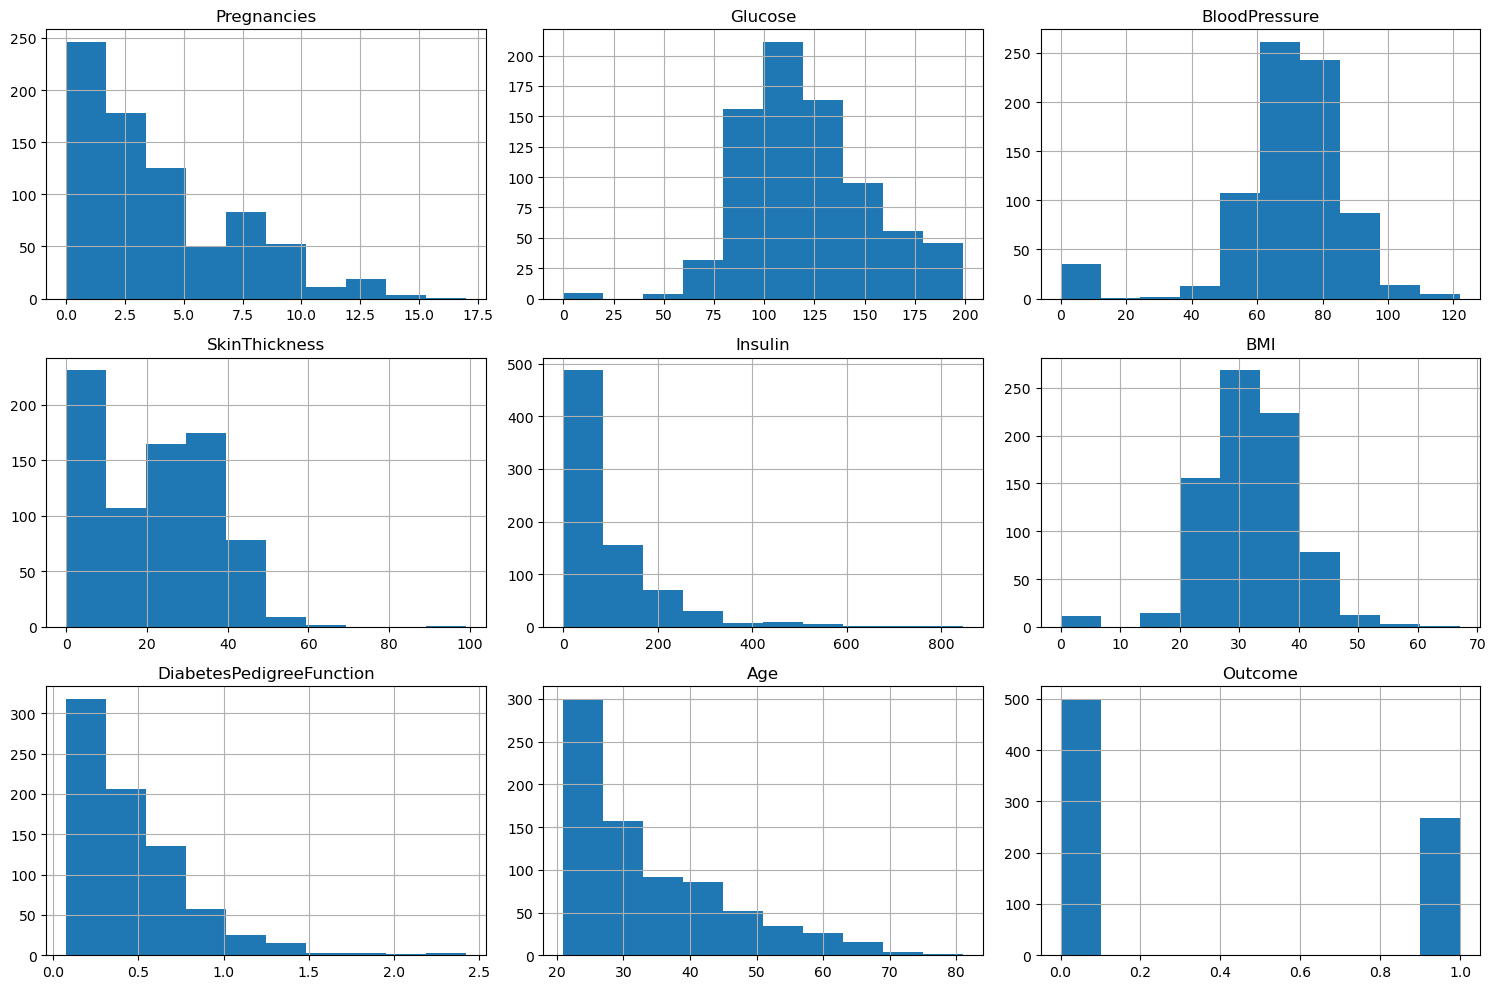

In [3]:

# Data Visualization
print("\nGenerating Histograms...")
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


Generating Boxplots...


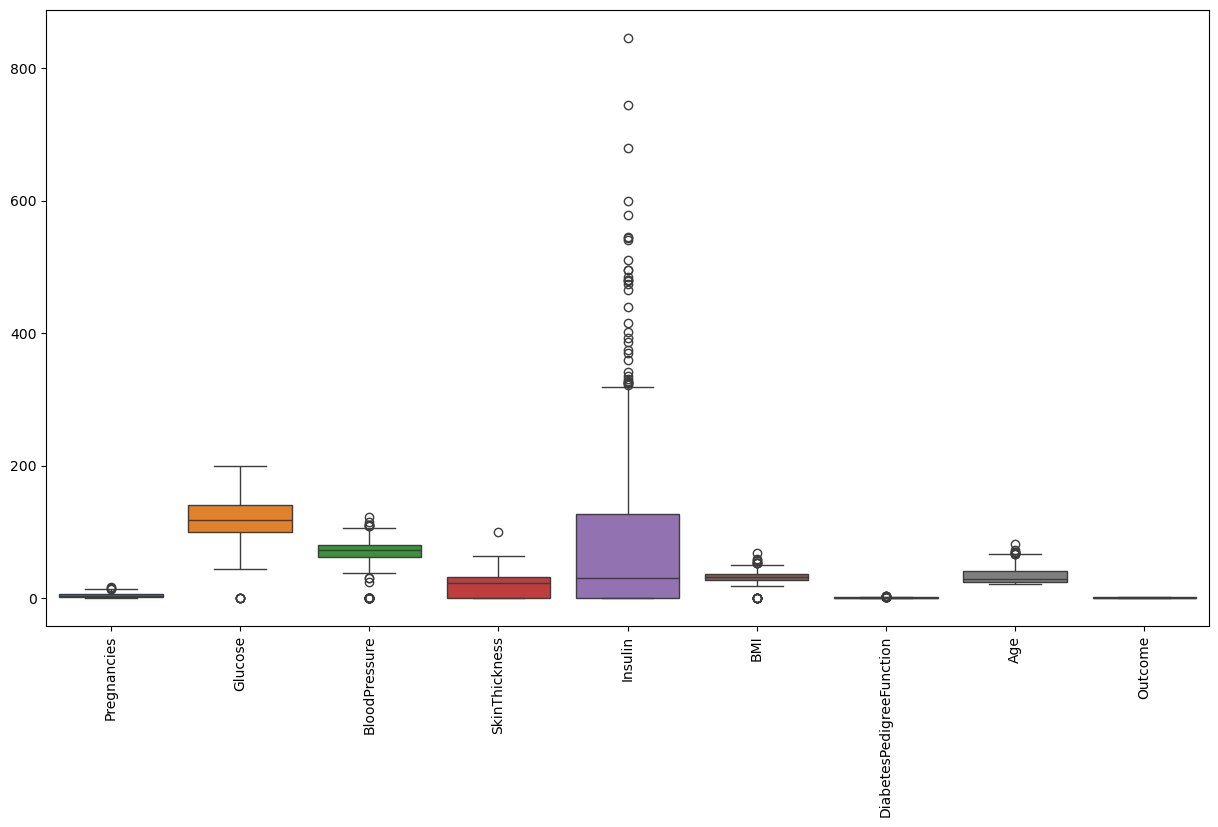

In [4]:

print("\nGenerating Boxplots...")
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


Generating Correlation Matrix...


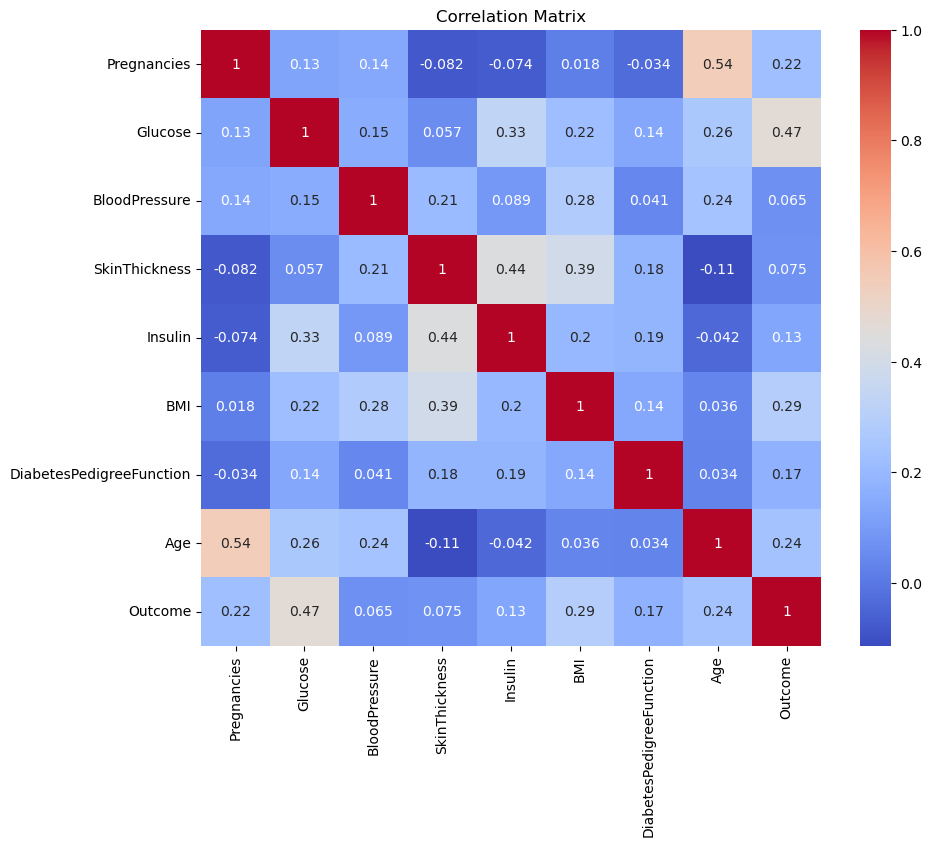

In [5]:

print("\nGenerating Correlation Matrix...")
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:

# 4. Data Preprocessing
# Replace invalid zero values with median
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols:
    df[col] = df[col].replace(0, df[col].median())

In [7]:

# 5. Split Features & Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [8]:

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:

# Build Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]



In [12]:

#Model Evaluation
print("\n===== MODEL EVALUATION =====")

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


===== MODEL EVALUATION =====
Accuracy : 0.7662337662337663
Precision: 0.6792452830188679
Recall   : 0.6545454545454545
F1 Score : 0.6666666666666666
ROC-AUC  : 0.8196510560146923

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



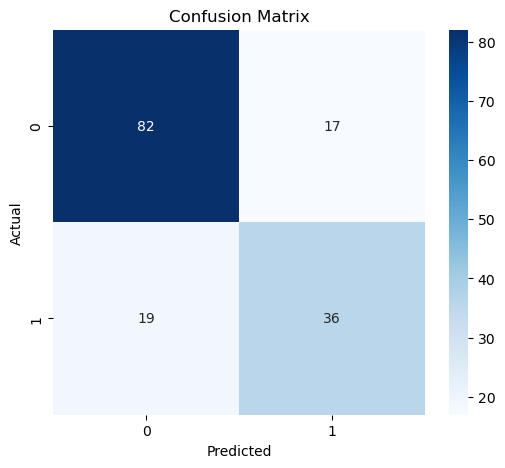

In [13]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

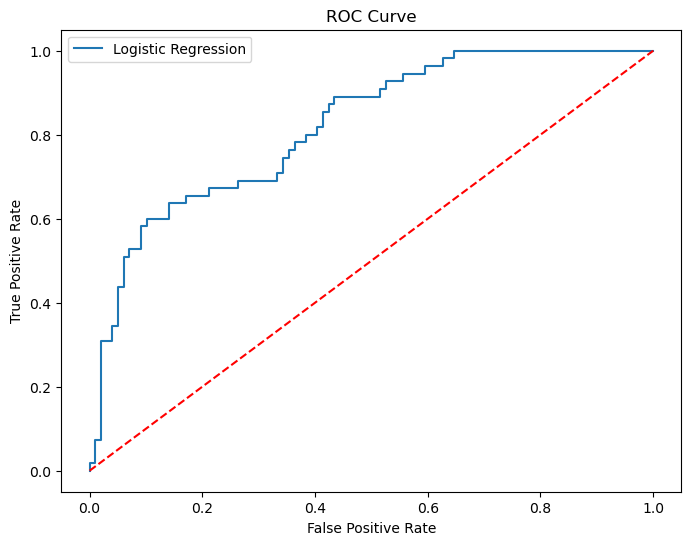

In [14]:

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--',color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [15]:

#Coefficient Interpretation
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

print("\nFeature Importance (Logistic Coefficients):")
print(coefficients.sort_values(by="Coefficient", ascending=False))


Feature Importance (Logistic Coefficients):
                    Feature  Coefficient
1                   Glucose     1.138214
5                       BMI     0.718367
7                       Age     0.378817
0               Pregnancies     0.218415
6  DiabetesPedigreeFunction     0.216745
3             SkinThickness     0.049443
2             BloodPressure    -0.165564
4                   Insulin    -0.224917


In [16]:

# Save Model for Deployment
joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel and Scaler Saved Successfully!")


Model and Scaler Saved Successfully!


In [17]:

# Interview Answers
print("\n===== INTERVIEW QUESTIONS =====")

print("\n1) Difference Between Precision and Recall:")
print("Precision = TP / (TP + FP)")
print("Recall = TP / (TP + FN)")
print("Precision measures correctness of positive predictions.")
print("Recall measures how many actual positives we captured.")

print("\n2) What is Cross-Validation?")
print("Cross-validation splits data into multiple folds (e.g., 5-fold).")
print("Model is trained on some folds and tested on remaining fold.")
print("It reduces overfitting and gives reliable performance estimate.")



===== INTERVIEW QUESTIONS =====

1) Difference Between Precision and Recall:
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Precision measures correctness of positive predictions.
Recall measures how many actual positives we captured.

2) What is Cross-Validation?
Cross-validation splits data into multiple folds (e.g., 5-fold).
Model is trained on some folds and tested on remaining fold.
It reduces overfitting and gives reliable performance estimate.
